### Часть 1. Первичная обработка данных.

In [286]:
import pandas as pd
import numpy as np

In [287]:
# Определяем имена признаков

col_names = ['id', 'cycle', 'setting1', 'setting2', 'setting3', 
             's1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14', 's15', 's16', 's17', 's18', 's19', 's20', 's21']


In [288]:
# Первичная обработка обучающих данных

df_train = pd.read_csv('./PM_train.txt', sep=' ', header=None)
df_train.drop([26, 27], axis=1, inplace=True)
df_train.columns = col_names

# создание метки TTF

df_max_cycle = pd.DataFrame(df_train.groupby('id').agg({'cycle': 'max'}))
df_max_cycle.reset_index(inplace=True)
df_max_cycle.columns = ['id', 'last_cycle']
df_train = pd.merge(df_train, df_max_cycle, on = 'id')
df_train['TTF'] = df_train['last_cycle'] - df_train['cycle']
df_train.drop(['last_cycle'], axis=1, inplace=True)

# создание меток классификационных меток
window_1 = 15
window_2 = 30

# Создание метки бинарной классификации
df_train['label_bnc'] = df_train['TTF'].apply(lambda x: 1 if x <= window_1 else 0)

# Создание метки мультиклассовой классификации
df_train['label_mcc'] = df_train['TTF'].apply(lambda x: 2 if x <= window_2 else 1 if x <= window_1 else 0)

df_train

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s15,s16,s17,s18,s19,s20,s21,TTF,label_bnc,label_mcc
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8.4195,0.03,392,2388,100.0,39.06,23.4190,191,0,0
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8.4318,0.03,392,2388,100.0,39.00,23.4236,190,0,0
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8.4178,0.03,390,2388,100.0,38.95,23.3442,189,0,0
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8.3682,0.03,392,2388,100.0,38.88,23.3739,188,0,0
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8.4294,0.03,393,2388,100.0,38.90,23.4044,187,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,8.4956,0.03,397,2388,100.0,38.49,22.9735,4,1,2
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,8.5139,0.03,395,2388,100.0,38.30,23.1594,3,1,2
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,8.5646,0.03,398,2388,100.0,38.44,22.9333,2,1,2
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,8.5389,0.03,395,2388,100.0,38.29,23.0640,1,1,2


In [289]:
# Первичная обработка тестировочных данных

df_test = pd.read_csv('./PM_test.txt', sep=' ', header=None)
df_test.drop([26, 27], axis=1, inplace=True)
df_test.columns = col_names

# Добавляем правдивые данные для тестировочных данных

df_truth = pd.read_csv('./PM_truth.txt', sep=' ', header=None)
df_truth.drop([1], axis=1, inplace=True)
df_truth.columns = ['more']
df_truth['id'] = df_truth.index + 1
df_test = pd.merge(df_test, df_truth, on='id')

# создание метки TTF

df_max_cycle = pd.DataFrame(df_test.groupby('id').agg({'cycle': 'max'}))
df_max_cycle.reset_index(inplace=True)
df_max_cycle.columns = ['id', 'last_cycle']
df_test = pd.merge(df_test, df_max_cycle, on='id')
df_test['TTF'] = df_test['more'] + df_test['last_cycle'] - df_test['cycle']
df_test.drop(['more', 'last_cycle'], axis=1, inplace=True)

# Создание метки бинарной классификации
df_test['label_bnc'] = df_test['TTF'].apply(lambda x: 1 if x <= window_1 else 0)

# Создание метки мультиклассовой классификации
df_test['label_mcc'] = df_test['TTF'].apply(lambda x: 2 if x <= window_2 else 1 if x <= window_1 else 0)

df_test

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s15,s16,s17,s18,s19,s20,s21,TTF,label_bnc,label_mcc
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,8.4052,0.03,392,2388,100.0,38.86,23.3735,142,0,0
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,8.3803,0.03,393,2388,100.0,39.02,23.3916,141,0,0
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,8.4441,0.03,393,2388,100.0,39.08,23.4166,140,0,0
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,8.3917,0.03,391,2388,100.0,39.00,23.3737,139,0,0
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,8.4031,0.03,390,2388,100.0,38.99,23.4130,138,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,100,194,0.0049,0.0000,100.0,518.67,643.24,1599.45,1415.79,14.62,...,8.4715,0.03,394,2388,100.0,38.65,23.1974,24,0,2
13092,100,195,-0.0011,-0.0001,100.0,518.67,643.22,1595.69,1422.05,14.62,...,8.4512,0.03,395,2388,100.0,38.57,23.2771,23,0,2
13093,100,196,-0.0006,-0.0003,100.0,518.67,643.44,1593.15,1406.82,14.62,...,8.4569,0.03,395,2388,100.0,38.62,23.2051,22,0,2
13094,100,197,-0.0038,0.0001,100.0,518.67,643.26,1594.99,1419.36,14.62,...,8.4711,0.03,395,2388,100.0,38.66,23.2699,21,0,2


### Часть 2. Предварительный анализ данных

In [290]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [291]:
# Признаки на анализ

features = ['setting1', 'setting2', 'setting3', 
            's1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14', 's15', 's16', 's17', 's18', 's19', 's20', 's21']

<Axes: title={'center': 'Стандартное отклонение признаков'}>

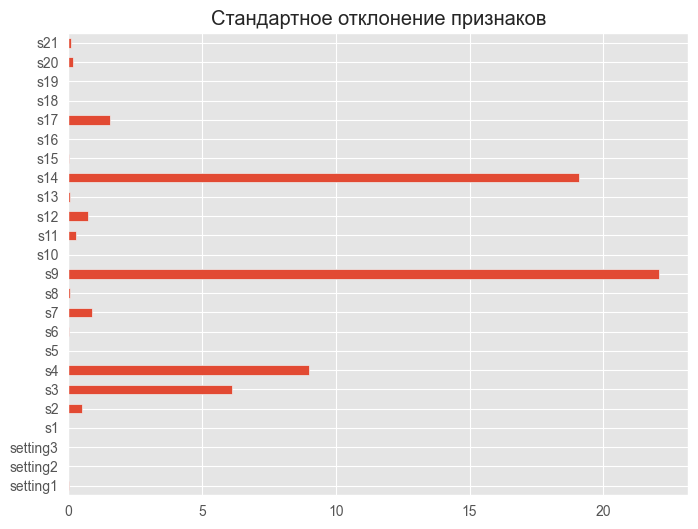

In [292]:
# Определяем стандартное отклонение (std) признаков по каждому параметру:

df_train[features].std().plot(kind='barh', figsize=(8, 6), title='Стандартное отклонение признаков')

<Axes: title={'center': 'Стандартное отклонение признаков (logy)'}>

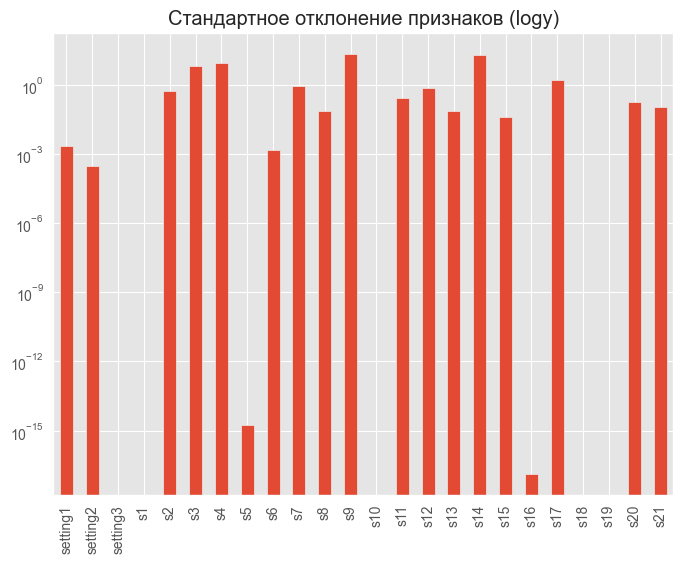

In [293]:
# std() с использованием "logy=True"
# При использовании логарифмической шкалы, небольшие различия в значениях будут более заметны, тогда как большие различия будут менее выраженными.

df_train[features].std().plot(kind='bar', figsize=(8, 6), logy=True, title="Стандартное отклонение признаков (logy)")

In [294]:
# Сформируем упорядоченный список значений дисперсии по каждому признаку
df_train_std = pd.DataFrame()
df_train_std['std'] = df_train[features].std().sort_values(ascending=True)
df_train_std

,std
setting3,0.000000e+00
s1,0.000000e+00
s19,0.000000e+00
s18,0.000000e+00
s10,0.000000e+00
s16,1.387812e-17
s5,1.776400e-15
setting2,2.930621e-04
s6,1.388985e-03
setting1,2.187313e-03


<Axes: title={'center': 'Стандартное отклонение'}>

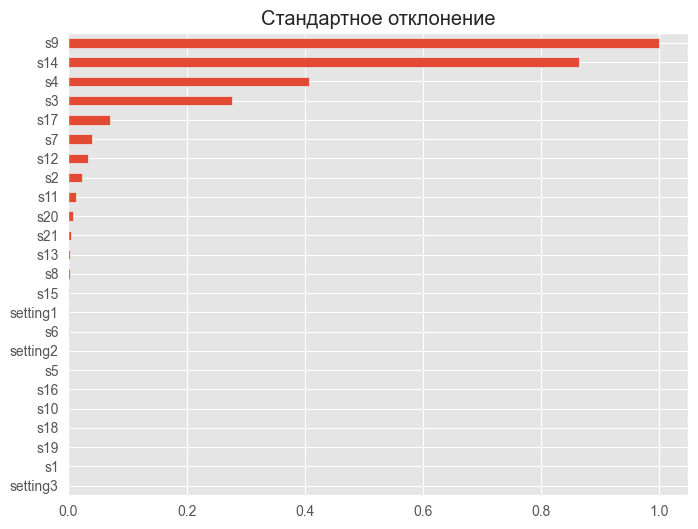

In [295]:
# Нормализация данных (выбор метода зависит от конкретной задачи и распределения данных)
# Методы нормализации данных (с использованием библиотеки sklearn [from sklearn.preprocessing import...]):

# Min-Max Scaling: [from sklearn.preprocessing import MinMaxScaler]
# Min-Max Scaling обеспечивает значения в заданном диапазоне

# Z-Score Normalization (стандартизация): [from sklearn.preprocessing import StandardScaler] 
# Z-Score Normalization центрирует данные и делает их подобными нормальному распределению

# Robust Scaling: [from sklearn.preprocessing import RobustScaler]
# Robust Scaling учитывает выбросы

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_train_std['std_norm'] = scaler.fit_transform(df_train_std[['std']])
df_train_std['std_norm'].plot(kind='barh', figsize=(8, 6), title='Стандартное отклонение')

In [296]:
# Посчитаем корреляцию признаков относительно регрессионной метки TTF
df_train_corr = pd.DataFrame()
df_train_corr['corr'] = df_train[features].corrwith(df_train['TTF']).sort_values(ascending=True)
df_train_corr['corr'] = df_train_corr['corr'].apply(lambda x: 0 if pd.isna(x) else x)
df_train_corr

c:\users\danil\.pyenv\pyenv-win\versions\3.9.6\lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\users\danil\.pyenv\pyenv-win\versions\3.9.6\lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


,corr
s11,-6.962281e-01
s4,-6.789482e-01
s15,-6.426670e-01
s2,-6.064840e-01
s17,-6.061536e-01
s3,-5.845204e-01
s8,-5.639684e-01
s13,-5.625688e-01
s9,-3.901016e-01
s14,-3.067689e-01


<Axes: title={'center': 'Корреляция признаков относительно TTF'}>

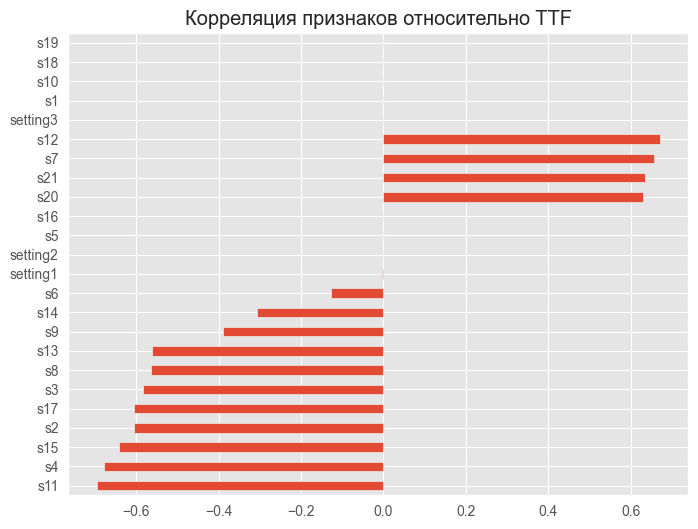

In [297]:
df_train_corr['corr'].plot(kind='barh', figsize=(8, 6), title='Корреляция признаков относительно TTF')

In [298]:
# Выведем основные метрики по признакам
df_train_stats = pd.concat([df_train_corr, df_train_std], axis=1)
df_train_stats

,corr,std,std_norm
s11,-6.962281e-01,2.670874e-01,1.209477e-02
s4,-6.789482e-01,9.000605e+00,4.075829e-01
s15,-6.426670e-01,3.750504e-02,1.698376e-03
s2,-6.064840e-01,5.000533e-01,2.264439e-02
s17,-6.061536e-01,1.548763e+00,7.013411e-02
s3,-5.845204e-01,6.131150e+00,2.776427e-01
s8,-5.639684e-01,7.098548e-02,3.214503e-03
s13,-5.625688e-01,7.191892e-02,3.256773e-03
s9,-3.901016e-01,2.208288e+01,1.000000e+00
s14,-3.067689e-01,1.907618e+01,8.638446e-01


### Определение признаков, которые имеют низкую корреляцию или дисперсию 

_Признаки, которые имеют низкую корреляцию с регрессионной меткой TTF и очень низкую дисперсию или ее отсутствие вообще_
_Эти признаки будут удалены из обучающих данных_

In [299]:
# Список признаков, которые имеют очень низкую дисперсию или ее отсутствие вообще
low_std_features = df_train_std.loc[:'s15', 'std_norm'].index.tolist()
df_train[low_std_features].describe()

,setting3,s1,s19,s18,s10,s16,s5,setting2,s6,setting1,s15
count,20631.0,20631.00,20631.0,20631.0,20631.0,2.063100e+04,2.063100e+04,20631.000000,20631.000000,20631.000000,20631.000000
mean,100.0,518.67,100.0,2388.0,1.3,3.000000e-02,1.462000e+01,0.000002,21.609803,-0.000009,8.442146
std,0.0,0.00,0.0,0.0,0.0,1.387812e-17,1.776400e-15,0.000293,0.001389,0.002187,0.037505
min,100.0,518.67,100.0,2388.0,1.3,3.000000e-02,1.462000e+01,-0.000600,21.600000,-0.008700,8.324900
25%,100.0,518.67,100.0,2388.0,1.3,3.000000e-02,1.462000e+01,-0.000200,21.610000,-0.001500,8.414900
50%,100.0,518.67,100.0,2388.0,1.3,3.000000e-02,1.462000e+01,0.000000,21.610000,0.000000,8.438900
75%,100.0,518.67,100.0,2388.0,1.3,3.000000e-02,1.462000e+01,0.000300,21.610000,0.001500,8.465600
max,100.0,518.67,100.0,2388.0,1.3,3.000000e-02,1.462000e+01,0.000600,21.610000,0.008700,8.584800


In [300]:
# Список признаков, которые имеют очень низкую корреляцию или ее отсутствие с регрессионной меткой TTF
low_cor_features = df_train_corr[df_train_corr['corr'].apply(lambda x: (x < 0.1) and (x > -0.1))].index.tolist()
df_train[low_cor_features].describe()

,setting1,setting2,s5,s16,setting3,s1,s10,s18,s19
count,20631.000000,20631.000000,2.063100e+04,2.063100e+04,20631.0,20631.00,20631.0,20631.0,20631.0
mean,-0.000009,0.000002,1.462000e+01,3.000000e-02,100.0,518.67,1.3,2388.0,100.0
std,0.002187,0.000293,1.776400e-15,1.387812e-17,0.0,0.00,0.0,0.0,0.0
min,-0.008700,-0.000600,1.462000e+01,3.000000e-02,100.0,518.67,1.3,2388.0,100.0
25%,-0.001500,-0.000200,1.462000e+01,3.000000e-02,100.0,518.67,1.3,2388.0,100.0
50%,0.000000,0.000000,1.462000e+01,3.000000e-02,100.0,518.67,1.3,2388.0,100.0
75%,0.001500,0.000300,1.462000e+01,3.000000e-02,100.0,518.67,1.3,2388.0,100.0
max,0.008700,0.000600,1.462000e+01,3.000000e-02,100.0,518.67,1.3,2388.0,100.0


In [301]:
# Признаки, которые будут удалены из обучающих данных (низкая корреляция и низкая дисперсия)
low_stats_features = np.intersect1d(low_std_features, low_cor_features).tolist()
low_stats_features

['s1', 's10', 's16', 's18', 's19', 's5', 'setting1', 'setting2', 'setting3']

In [302]:
# Список признаков, имеющих высокую дисперсию 
high_std_features = df_train_std.loc['s8':, 'std_norm'].index.tolist()
df_train[high_std_features].describe()

,s8,s13,s21,s20,s11,s2,s12,s7,s17,s3,s4,s14,s9
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000
mean,2388.096652,2388.096152,23.289705,38.816271,47.541168,642.680934,521.413470,553.367711,393.210654,1590.523119,1408.933782,8143.752722,9065.242941
std,0.070985,0.071919,0.108251,0.180746,0.267087,0.500053,0.737553,0.885092,1.548763,6.131150,9.000605,19.076176,22.082880
min,2387.900000,2387.880000,22.894200,38.140000,46.850000,641.210000,518.690000,549.850000,388.000000,1571.040000,1382.250000,8099.940000,9021.730000
25%,2388.050000,2388.040000,23.221800,38.700000,47.350000,642.325000,520.960000,552.810000,392.000000,1586.260000,1402.360000,8133.245000,9053.100000
50%,2388.090000,2388.090000,23.297900,38.830000,47.510000,642.640000,521.480000,553.440000,393.000000,1590.100000,1408.040000,8140.540000,9060.660000
75%,2388.140000,2388.140000,23.366800,38.950000,47.700000,643.000000,521.950000,554.010000,394.000000,1594.380000,1414.555000,8148.310000,9069.420000
max,2388.560000,2388.560000,23.618400,39.430000,48.530000,644.530000,523.380000,556.060000,400.000000,1616.910000,1441.490000,8293.720000,9244.590000


In [303]:
# Список признаков, имеющих высокую корреляцию
high_corr_features = df_train_corr[df_train_corr['corr'].apply(lambda x: (x < -0.1) or (x > 0.1))].index.tolist()
df_train[high_corr_features].describe()

,s11,s4,s15,s2,s17,s3,s8,s13,s9,s14,s6,s20,s21,s7,s12
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000
mean,47.541168,1408.933782,8.442146,642.680934,393.210654,1590.523119,2388.096652,2388.096152,9065.242941,8143.752722,21.609803,38.816271,23.289705,553.367711,521.413470
std,0.267087,9.000605,0.037505,0.500053,1.548763,6.131150,0.070985,0.071919,22.082880,19.076176,0.001389,0.180746,0.108251,0.885092,0.737553
min,46.850000,1382.250000,8.324900,641.210000,388.000000,1571.040000,2387.900000,2387.880000,9021.730000,8099.940000,21.600000,38.140000,22.894200,549.850000,518.690000
25%,47.350000,1402.360000,8.414900,642.325000,392.000000,1586.260000,2388.050000,2388.040000,9053.100000,8133.245000,21.610000,38.700000,23.221800,552.810000,520.960000
50%,47.510000,1408.040000,8.438900,642.640000,393.000000,1590.100000,2388.090000,2388.090000,9060.660000,8140.540000,21.610000,38.830000,23.297900,553.440000,521.480000
75%,47.700000,1414.555000,8.465600,643.000000,394.000000,1594.380000,2388.140000,2388.140000,9069.420000,8148.310000,21.610000,38.950000,23.366800,554.010000,521.950000
max,48.530000,1441.490000,8.584800,644.530000,400.000000,1616.910000,2388.560000,2388.560000,9244.590000,8293.720000,21.610000,39.430000,23.618400,556.060000,523.380000


In [304]:
# Список признаков, имеющих высокую корреляцию с регрессионной меткой TTF и дисперсию
high_stats_features = np.intersect1d(high_std_features, high_corr_features).tolist()
high_stats_features

['s11',
 's12',
 's13',
 's14',
 's17',
 's2',
 's20',
 's21',
 's3',
 's4',
 's7',
 's8',
 's9']

In [316]:
# Определяем признаки, которые не были удалены из обучающих данных из-за низкой корреляции и дисперсии
corel_features = features
for i, feature in enumerate(corel_features, start=0):
    for low_stats_feature in low_stats_features:
        if feature == low_stats_feature:
            corel_features.pop(i)

In [317]:
corel_features

['s2',
 's3',
 's4',
 's6',
 's7',
 's8',
 's9',
 's11',
 's12',
 's13',
 's14',
 's15',
 's17',
 's20',
 's21']

_Признаки ['s2','s3','s4','s6','s7','s8','s9','s11','s12','s13','s14','s15','s17','s20','s21'] имеют высокий шанс попадания в сет обучающих данных._
_Отобразим корреляцию этих признаков с регресионной меткой TTF на тепловой карте_